<a href="https://colab.research.google.com/github/Jamal-1018/Bike-sharing-demand-prediction-Regression-Analysis/blob/main/Bike_demand_prediction_Regression_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    : **Bike Sharing Demand Prediction**


##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name**            - Md Jamaluddin

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
#Connecting to the drive to import our dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing the required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math

import warnings
warnings.filterwarnings('ignore')

import datetime

### Dataset Loading

In [3]:
# Load Dataset
DATA = pd.read_csv('/content/drive/MyDrive/ALMABETTER CAPSTONE PROJECTS/REGRESSION_Bike_sharing_Demand_Prediction/SeoulBikeData.csv', encoding = 'unicode_escape')

### Dataset First View

In [4]:
# Dataset First Look
DATA

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [5]:
# Bottom 5 rows of the dataset
DATA.tail(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
DATA.shape
print(f'The number of rows in the dataset is - {DATA.shape[0]}')
print(f'The number of columns in the dataset is - {DATA.shape[1]}')

The number of rows in the dataset is - 8760
The number of columns in the dataset is - 14


### Dataset Information

In [7]:
# Dataset Info
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
DATA[DATA.duplicated()].shape

(0, 14)

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
DATA.isnull().sum().value_counts()

0    14
dtype: int64

In [10]:
# Visualizing the missing values
DATA.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

### What did you know about your dataset?

With 8760 rows and 14 columns, the dataset shows no signs of duplicated, null, or missing values. Further data wrangling processes can now be carried out to perform demand prediction analysis.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
DATA.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [12]:
# Dataset Describe
DATA.describe(include = 'all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


### Variables Description

Date - Date `Categorical`

Rented Bike Count - Number of rented bikes `Numerical`

Hour - Hour of the day(0 - 23) `Numerical`

Tempratures(°C) - Temprature of the day `Numerical`

Humidity(%) - Humidity measure `Numerical`

Wind speed (m/s) - Windspeed `Numerical`

Visibility (10m/s) - visibility `Numerical`

Dew point temperature(°C) - Dew point temprature measures `Numerical`

Solar Radiation (MJ/m2) - Solar radiation measure `Numerical`

Rainfall(mm) - Rainfall in mm `Numerical`

Snowfall (cm) - snowfall  `Numerical`

Seasons - (1 = spring, 2 = summer,3 = fall, 4 = winter)`Categorical`

Holiday - Holiday or Not Holiday `categorical`

Functioning Day -Functioning day Yes/No `Categorical`


### Check Unique Values for each variable.

In [13]:
# Lets create a copy of our dataset
df = DATA.copy()

In [16]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print(f'The number of unique values in {i} column are: {df[i].nunique()}')

The number of unique values in Date column are: 365
The number of unique values in Rented Bike Count column are: 2166
The number of unique values in Hour column are: 24
The number of unique values in Temperature(°C) column are: 546
The number of unique values in Humidity(%) column are: 90
The number of unique values in Wind speed (m/s) column are: 65
The number of unique values in Visibility (10m) column are: 1789
The number of unique values in Dew point temperature(°C) column are: 556
The number of unique values in Solar Radiation (MJ/m2) column are: 345
The number of unique values in Rainfall(mm) column are: 61
The number of unique values in Snowfall (cm) column are: 51
The number of unique values in Seasons column are: 4
The number of unique values in Holiday column are: 2
The number of unique values in Functioning Day column are: 2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [17]:
# Converting the date variable into date format for further analysis
df['Date'] = pd.to_datetime(df['Date'],format = "%d/%m/%Y").dt.date

In [18]:
# creating new varibles of month and day to make oue analysis more efficient
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Day_of_the_month'] = pd.to_datetime(df['Date']).dt.day

In [71]:
# creating a new varible 'Day of the week'
df['Day_of_week'] = pd.to_datetime(df['Date']).dt.dayofweek


In [73]:
# Creating new variable 'Is_weekend'
df['is_weekend']  = df['Day_of_week'].apply(lambda x: 1 if x > 4 else 0)   # 1 for weekend and 0 for weekday

In [74]:
# After creating two new date columns
print(df.shape)

(8760, 18)


### What all manipulations have you done and insights you found?

The date variable has been converted to datetime format to enhance analysis and computations. Additional variables `day_of_the_month`,`month`,`Day_of_week`,`is_weekend` have been extracted from the date column for further analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Visualization on Dependent variable `Rented Bike Count`

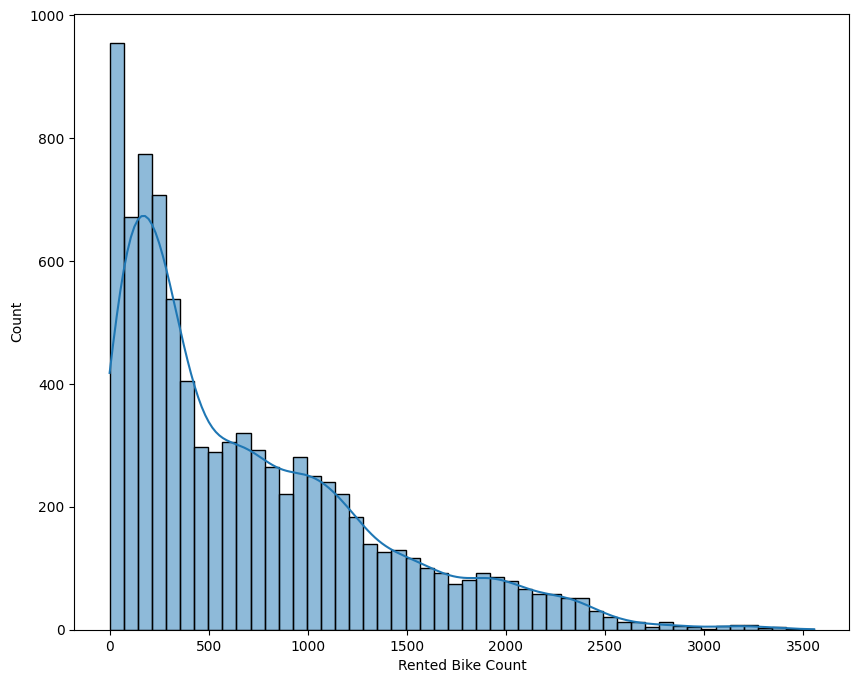

In [76]:
# Plotting histogram plot on rented bike count
plt.figure(figsize = (10,8))
sns.histplot(df['Rented Bike Count'], bins = 50, kde = True)
plt.show()

<Axes: ylabel='Rented Bike Count'>

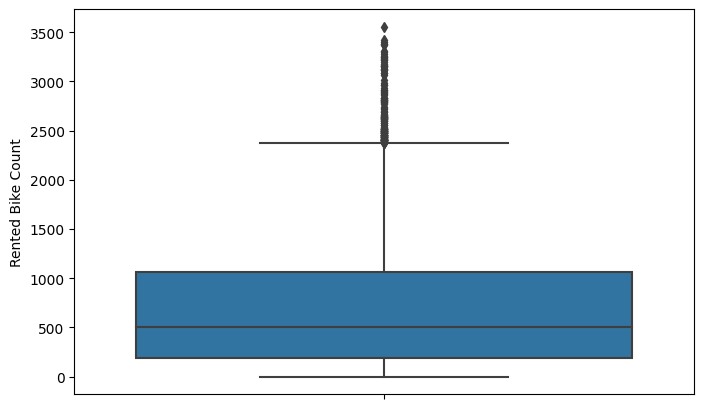

In [77]:
# using boxplot on the dependent variable
plt.figure(figsize = (8,5))
sns.boxplot( y =df['Rented Bike Count'])

##### 1. Why did you pick the specific chart?

A histplot is a type of chart that displays the distribution of a dataset. It is a graphical representation of the data that shows how often each value or group of values occurs. Histplots are useful for understanding the distribution of a dataset and identifying patterns or trends in the data. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.
Here we use this plot on dependent variable.

A box plot is a standardized way of displaying the distribution of numerical data through quartiles. It provides a visual summary of the data's central tendency, spread, and symmetry, as well as highlighting potential outliers.
Here we used on rented count of bikes variable to know its frequency.

##### 2. What is/are the insight(s) found from the chart?

From the visualization, we can observe that the count of bikes ranges between 0 to 1200. The occurrences of counts greater than 2500 are relatively scarce, and they appear as outliers in the boxplot

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The above visualization reveals a positive business impact. A noteworthy aspect is that the count of bikes is significantly higher for values below 500 bikes. To gain further insights, we will conduct additional analysis.

#### Chart - 2 Visualization on Continuous independent variables


In [91]:
# Assigning the categorical and continuous varibles for the easy computational process.
dep_var = 'Rented Bike Count'

cont_var = ['Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']

cat_var = ['Date','Hour','Seasons','Holiday','Functioning Day','Month','Day_of_the_month','Day_of_week','is_weekend']

print(f'The continuous varibles are {cont_var}')
print(f'The categorical variables are {cat_var}')
print(f'The dependent variable is {dep_var}')

The continuous varibles are ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
The categorical variables are ['Date', 'Hour', 'Seasons', 'Holiday', 'Functioning Day', 'Month', 'Day_of_the_month', 'Day_of_week', 'is_weekend']
The dependent variable is Rented Bike Count


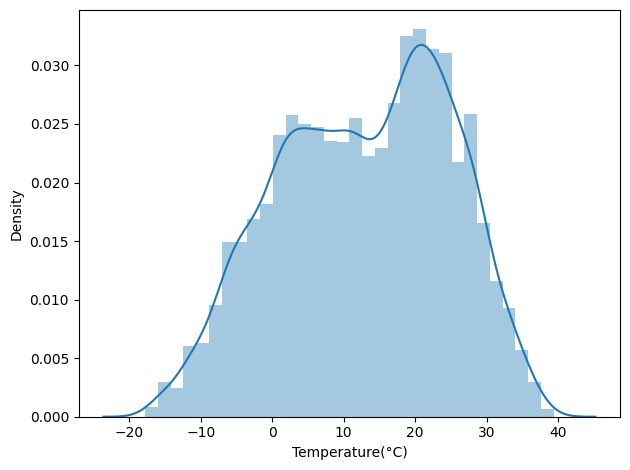

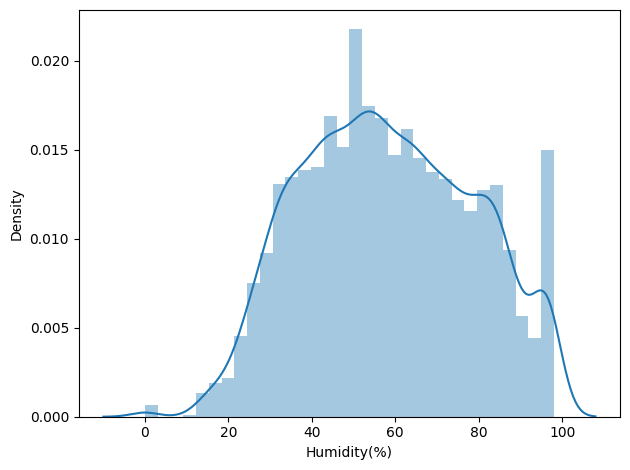

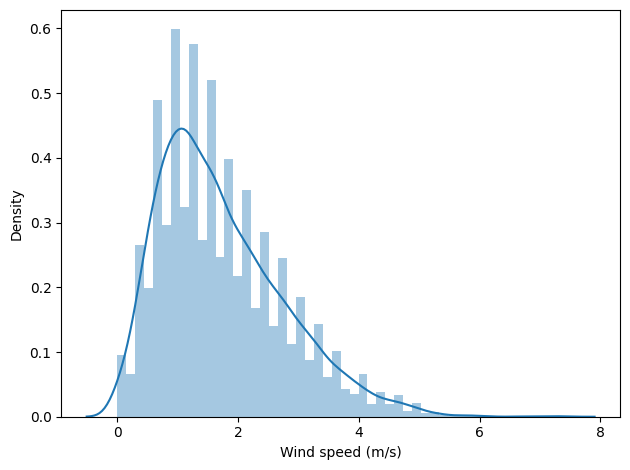

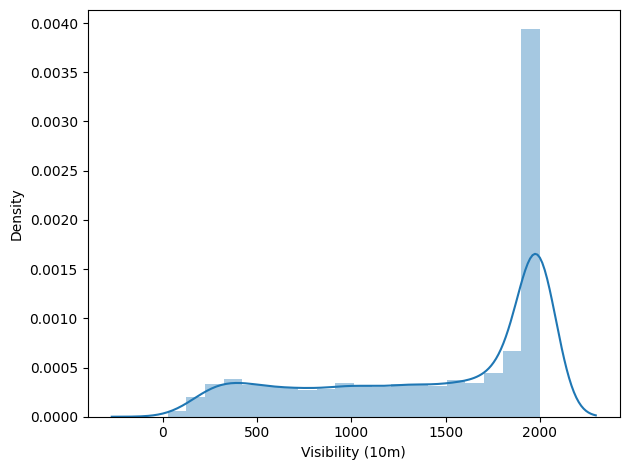

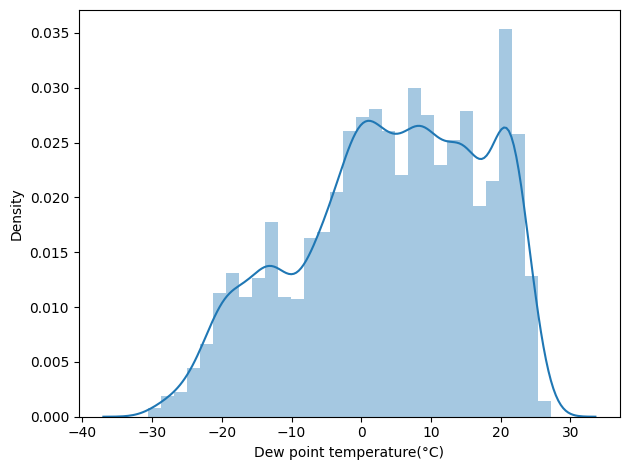

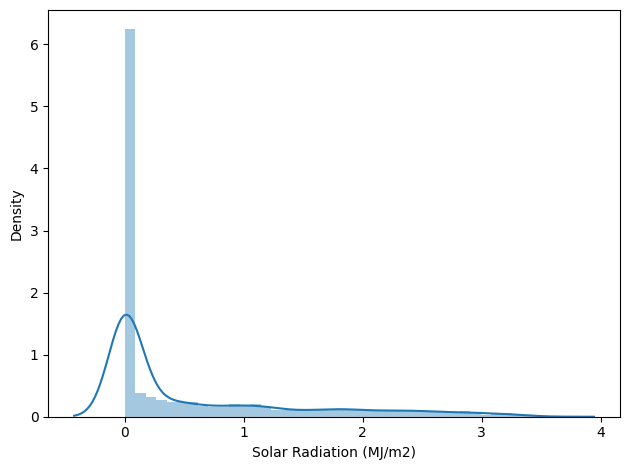

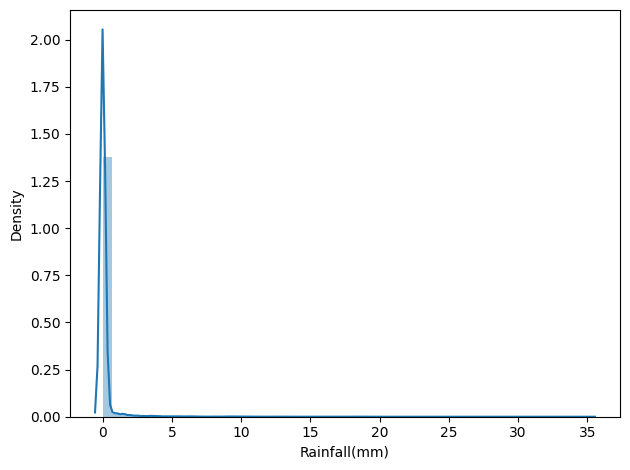

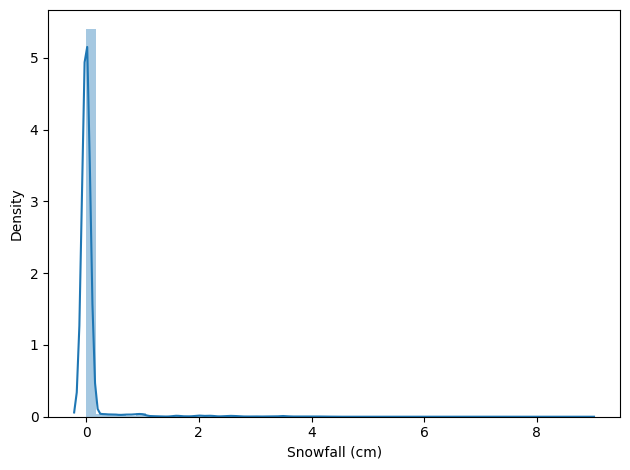

In [94]:
# plotting a distribution graph on continuous independent variable
for col in cont_var :
  sns.distplot(df[col])
  plt.tight_layout()
  plt.show()

##### 1. Why did you pick the specific chart?

A distplot, also known as a histogram-kernel density estimate (KDE) plot. It is useful because it provides a quick and easy way to check the distribution of the data, identify patterns or outliers, and compare the distribution of multiple variables. It also allows to check if the data is following normal distribution or not.

##### 2. What is/are the insight(s) found from the chart?

From the above Univariate analysis, we got to know that temprature and humidity shows normally distributed and remaining shows different distributions.
We can observe outliers in Snowfall, Rainfall,solar radiation, wind speed columns.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the skewness of variables like rainfall, wind speed, snowfall, and dew point temperature can aid in making informed decisions and improving various aspects of the business.These variables are negatively skewed could mean that extreme weather events (e.g., heavy rainfall, strong winds, or snowstorms) are relatively infrequent, allowing businesses to allocate appropriate resources for maintenance and infrastructure improvement.

#### Chart - 3 Visualization continuous independent variables

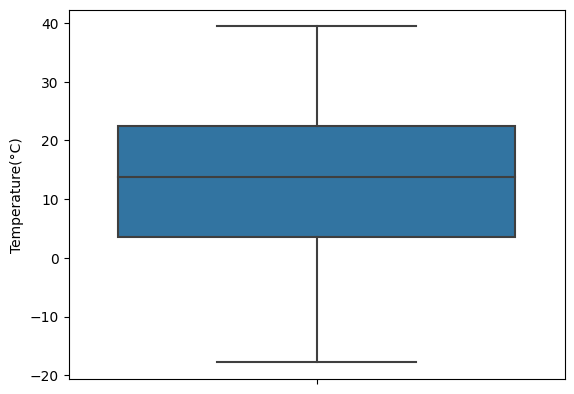

<Figure size 1000x800 with 0 Axes>

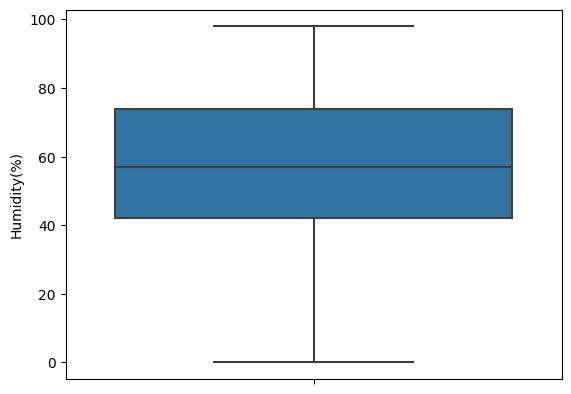

<Figure size 1000x800 with 0 Axes>

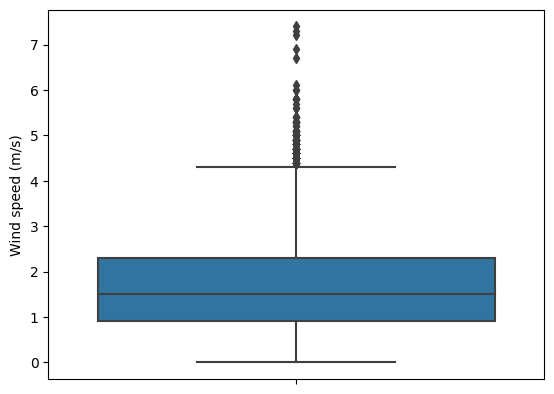

<Figure size 1000x800 with 0 Axes>

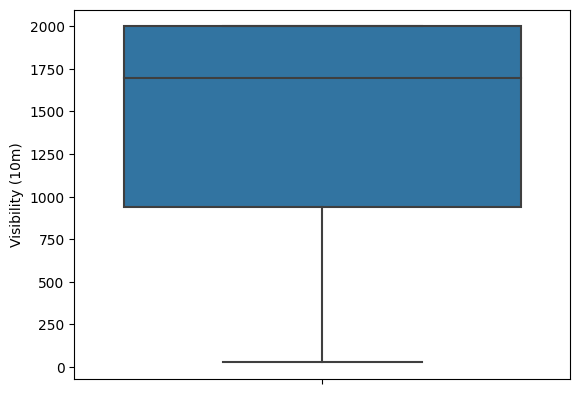

<Figure size 1000x800 with 0 Axes>

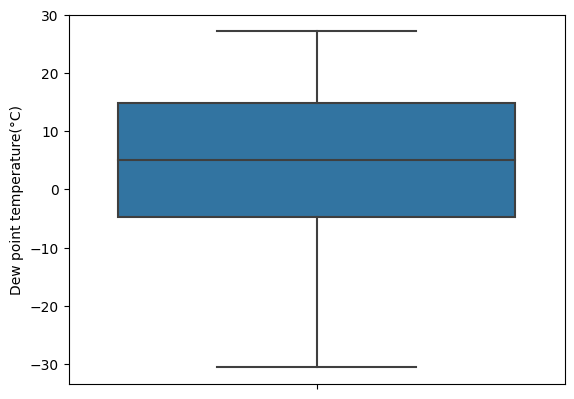

<Figure size 1000x800 with 0 Axes>

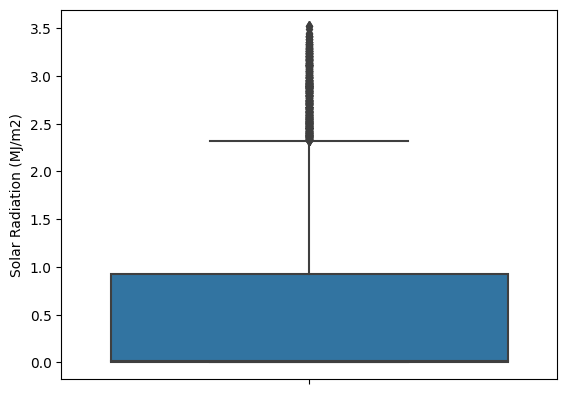

<Figure size 1000x800 with 0 Axes>

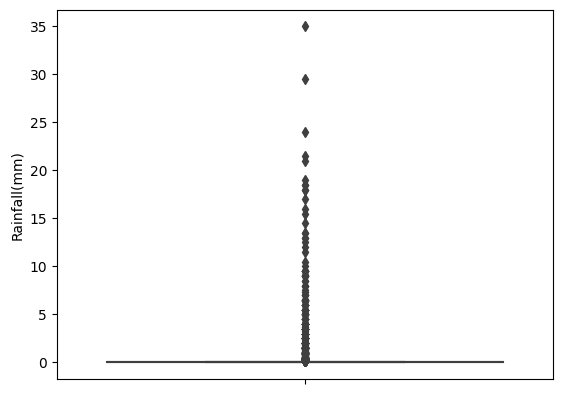

<Figure size 1000x800 with 0 Axes>

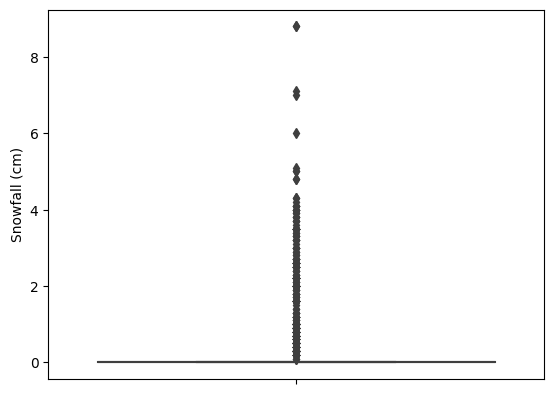

<Figure size 1000x800 with 0 Axes>

In [95]:
# plotting boxplot on numerical variables
for col in cont_var:
  sns.boxplot( y= df[col])
  plt.figure(figsize = (10,8))
  plt.tight_layout()
  plt.show()

##### 1. Why did you pick the specific chart?

A box plot is a standardized way of displaying the distribution of numerical data through quartiles. It provides a visual summary of the data's central tendency, spread, and symmetry, as well as highlighting potential outliers. Here we used on all numerical independent variables to find the spread.

##### 2. What is/are the insight(s) found from the chart?


From the above analysis we got the below insights:

Humidity: The data spread for humidity lies between 40% and 60%, indicating a relatively consistent range of humidity values.

Rainfall: Most of the rainfall data is concentrated at 0, suggesting that a significant portion of the dataset experiences little to no rainfall. Outliers are observed, which might represent extreme rainfall events.

Day_of_the_month: The data spread for the day of the month is observed between 7 and 23, covering a range of days.

Solar radiation: Solar radiation data is primarily distributed between 0 and 1.0, indicating that the dataset mostly contains low solar radiation values.

Wind speed: Wind speed data spread is between 1 and 2, suggesting that wind speeds are relatively moderate.

Month: The data spread for the month ranges from 4 to 10, representing different months in the dataset.

Temperature: The temperature data spread is observed between 2 and 25, covering a range of temperatures.

Hour: Hour data is spread from 6 to 19, representing different hours of the day.

Snowfall: The snowfall data shows outliers, and most of the data is concentrated at 0, indicating infrequent snowfall events.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

On days with rainfall or extreme weather events (outliers), they can offer promotional incentives or alternative transportation options to maintain customer satisfaction.On the tempratures consideration,Businesses can plan for increased bike availability and ensure proper maintenance during peak seasons. Snowfall weather conditions by implementing snow removal plans or temporary suspension of bike services to ensure customer safety and maintain the condition of bikes.

By integrating weather data into their demand forecasting models, businesses can adopt dynamic pricing and marketing strategies.

#### Chart - 4 Visualization on Categorical and dependent variable ( Bivariate analysis)

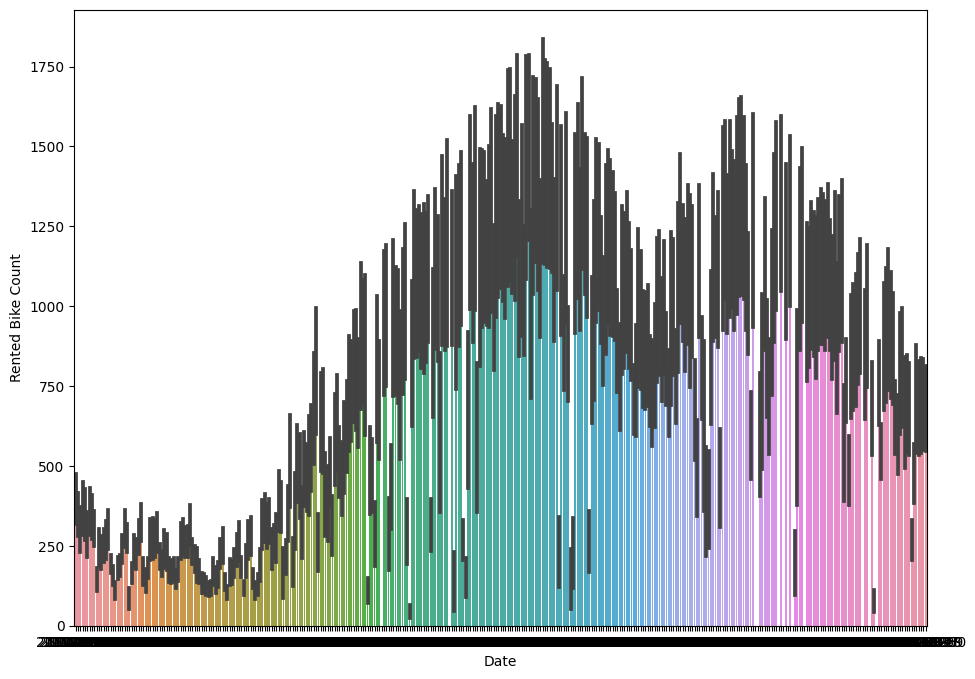

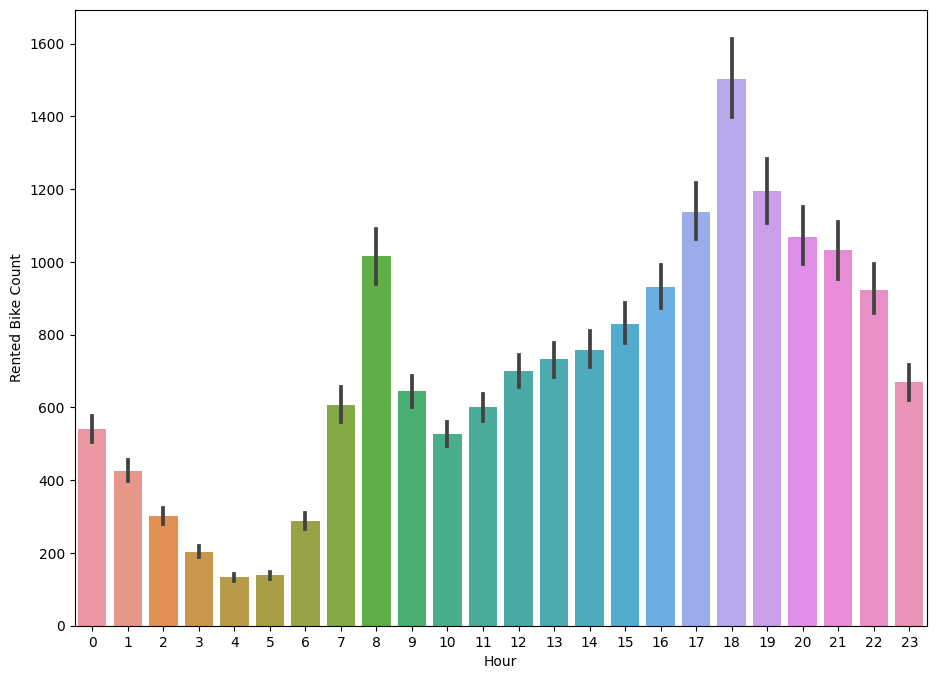

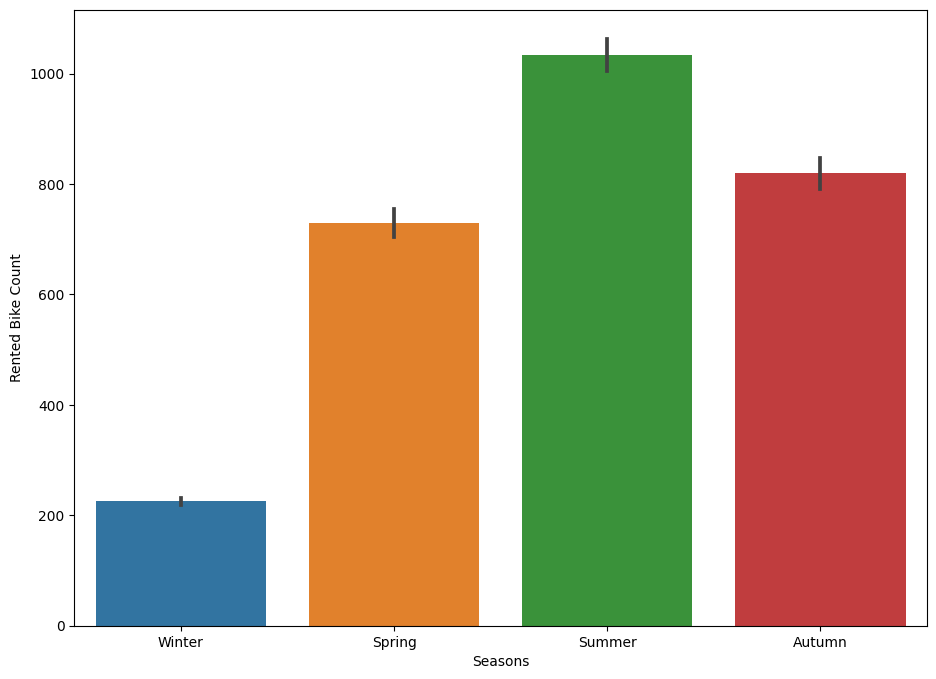

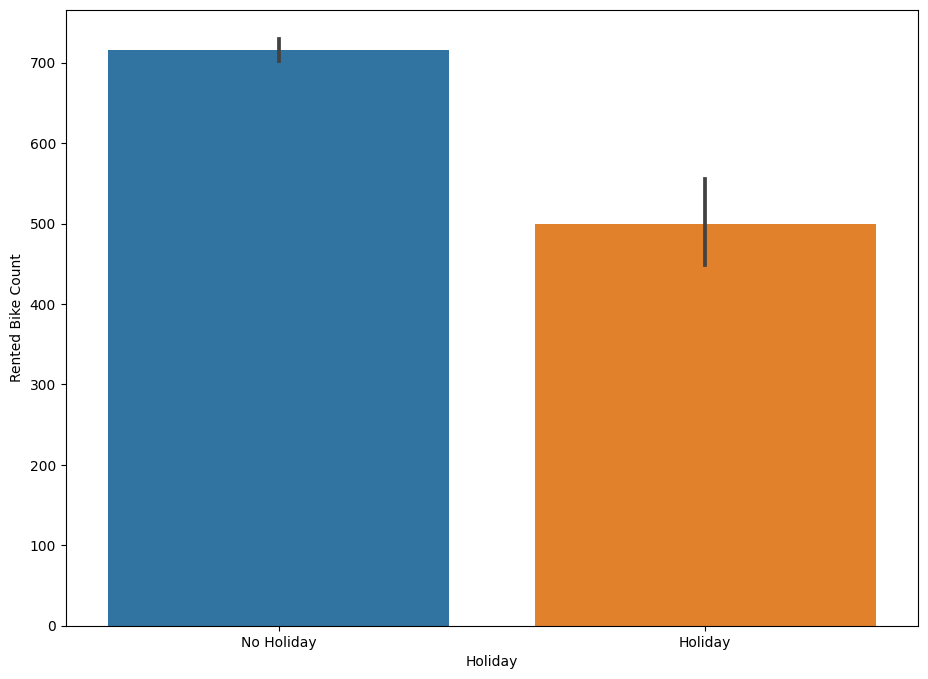

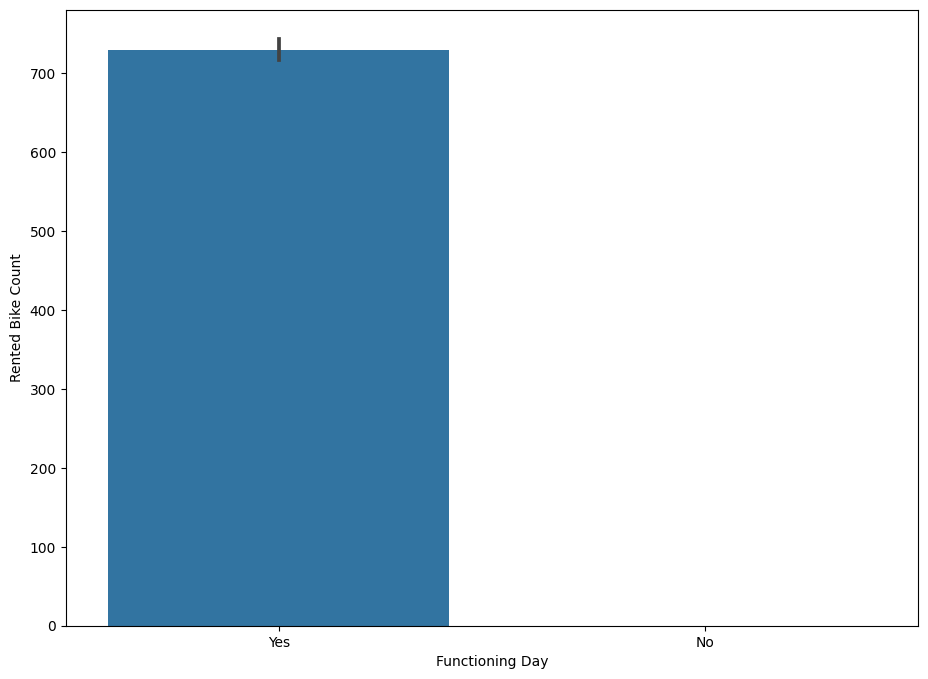

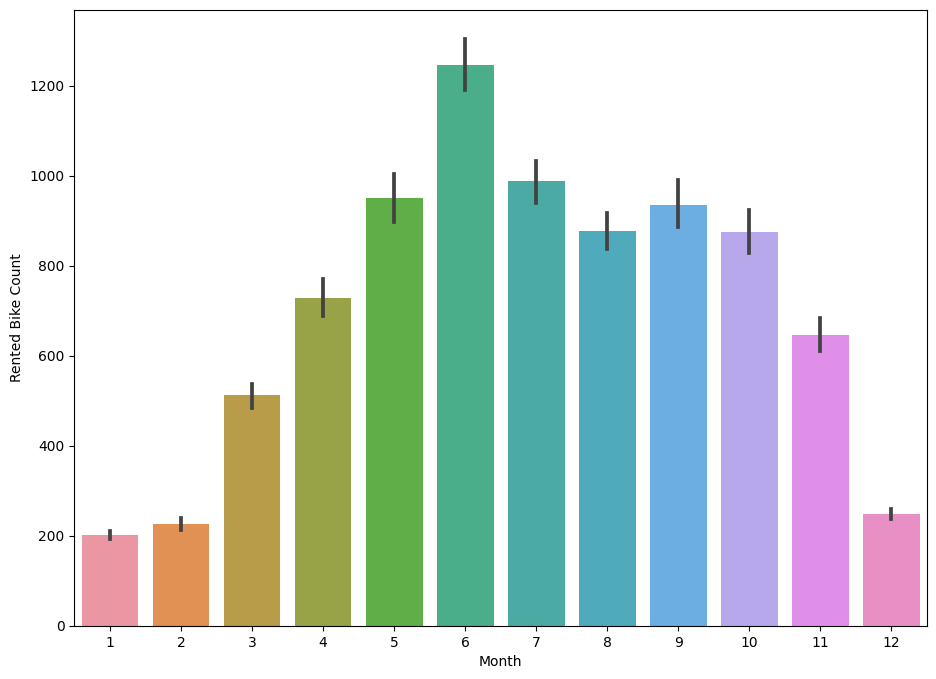

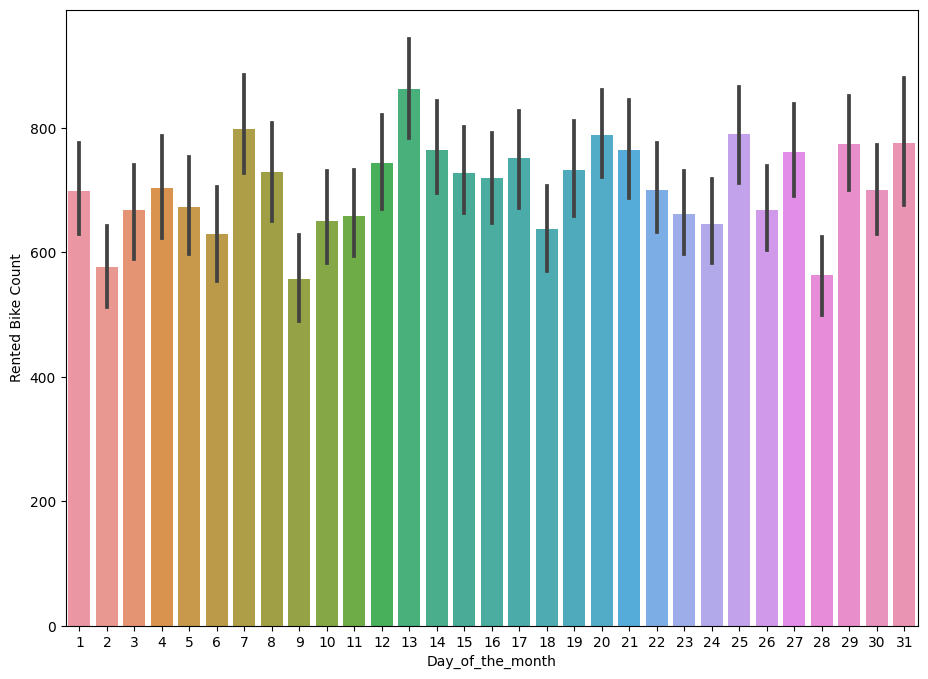

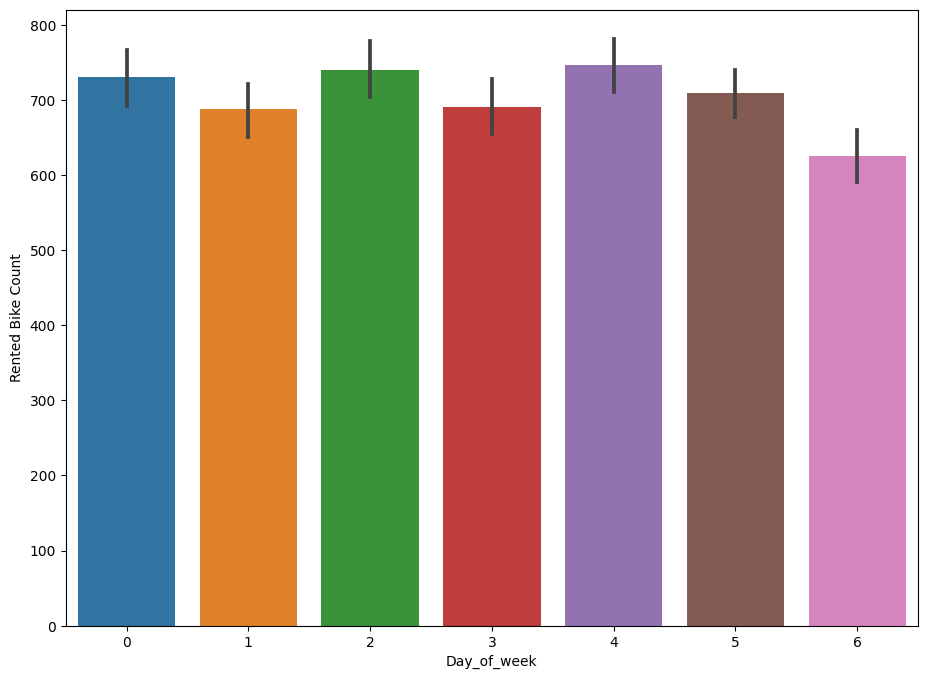

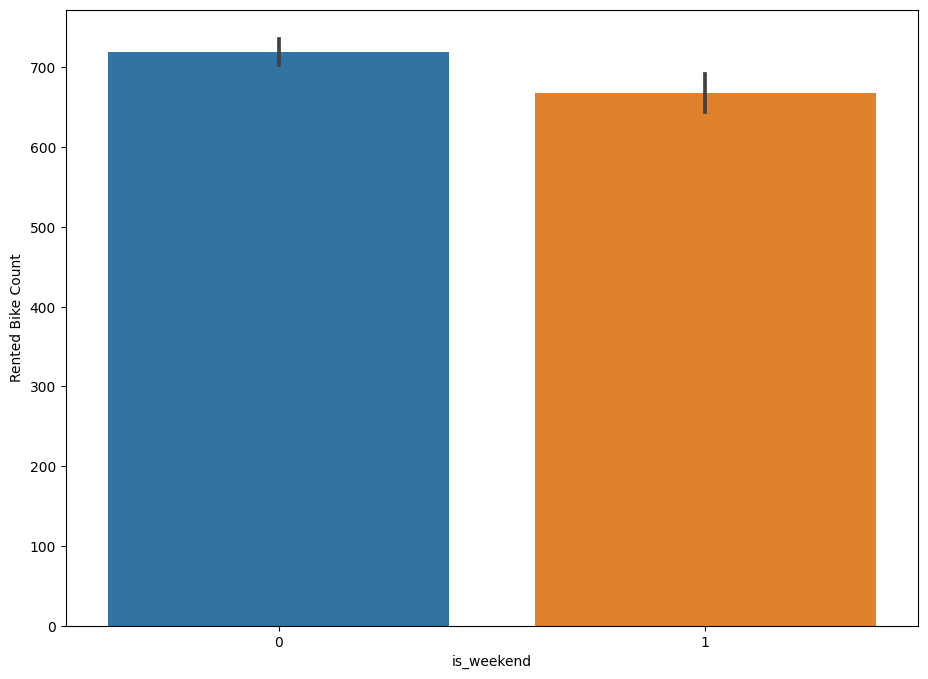

<Figure size 640x480 with 0 Axes>

In [143]:
#Analyzing the relationship between dependent variable and categorical variables
for i, col in enumerate(cat_var):
  plt.figure(figsize = (11,8))
  sns.barplot(x =df[col], y = df['Rented Bike Count'])
  plt.show()
plt.tight_layout()

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.
Here we used on this plots on catergorical independent variables with dependent variable.

##### 2. What is/are the insight(s) found from the chart?

The above bivariate analysis reveals the following insights:

Regarding the relationship between the hour of the day and the count of rented bikes, it is evident that demand surges from 5pm to 7pm, peaking at 6pm and high trend at 8am in the morning.

The count of bikes is notably higher on functioning days, non-holidays, and weekdays.

It's observed that the demand for bikes is at its peak during the summer month of June and decreases during the winter months.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the positive business impact is the company can ensure that they have a sufficient number of bikes available during these high-demand hours and run promotional campaigns to attract riders during these times. This can lead to increased rentals and revenue.

Understanding the peak demand in the summer month of June and lower demand during the winter months informs seasonal inventory management. The company can adjust its bike fleet, marketing campaigns, and pricing strategies to accommodate the seasonally fluctuating demand, which can lead to more efficient operations and revenue optimization.

#### Chart - 5 Visualization on dependent variable and `hour` variable

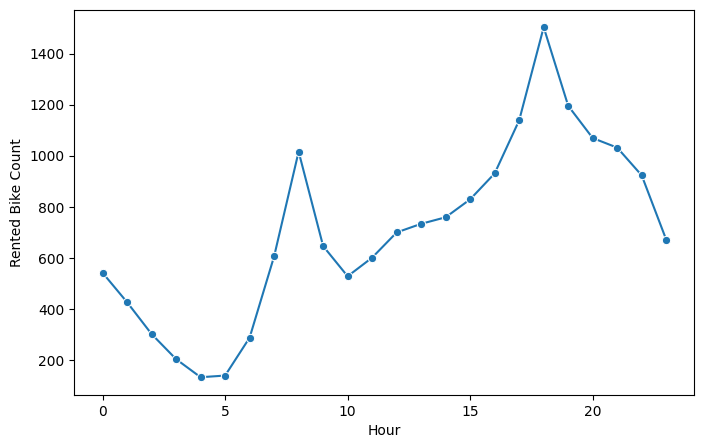

In [158]:
#Plotting graph of Rented bike count on hourly basis using line plot
plt.figure(figsize = (8,5))
avg_hour = df.groupby(df['Hour'])['Rented Bike Count'].mean()
sns.lineplot(avg_hour,marker = 'o')
plt.show()

##### 1. Why did you pick the specific chart?

A line plot, also known as a line chart or line graph, is a way to visualize the trend of a single variable over time. It uses a series of data points connected by a line to show how the value of the variable changes over time.

Line plots are useful because they can quickly and easily show trends and patterns in the data. They are particularly useful for showing how a variable changes over a period of time. They are also useful for comparing the trends of multiple variables.

Here to show the trend of the average value of the count with respective to the hour.

##### 2. What is/are the insight(s) found from the chart?


From the above analysis, the insights are as follows:

- The average bike count is highest at 8 AM in the morning.

- There is a gradual increase in the count from 5 PM to 11 PM, with the peak occurring at 6 PM.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can indeed help create a positive business impact. Understanding the patterns of bike demand during specific hours can lead to targeted strategies, efficient resource allocation, and improved customer satisfaction.

The insight that the count of bikes is high in the eveing indicates a peak demand hour. This knowledge can be leveraged to ensure sufficient bike availability, maintenance, and customer support during peak hours.

This presents an opportunity for the company to target evening riders and implement strategies to meet this growing demand. It can include promotions for after-work rides, extended service hours, and efficient bike maintenance during this period.

#### Chart - 6 Visualization on all numerical independent variables with date, month, day variables.( Bivariate Analysis)

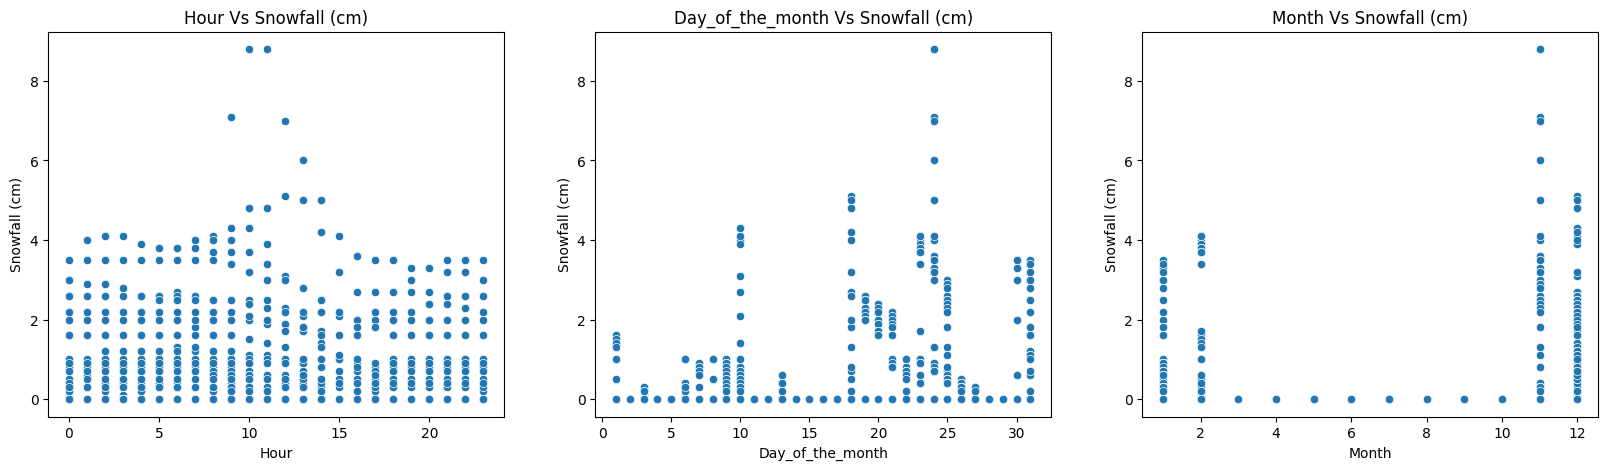

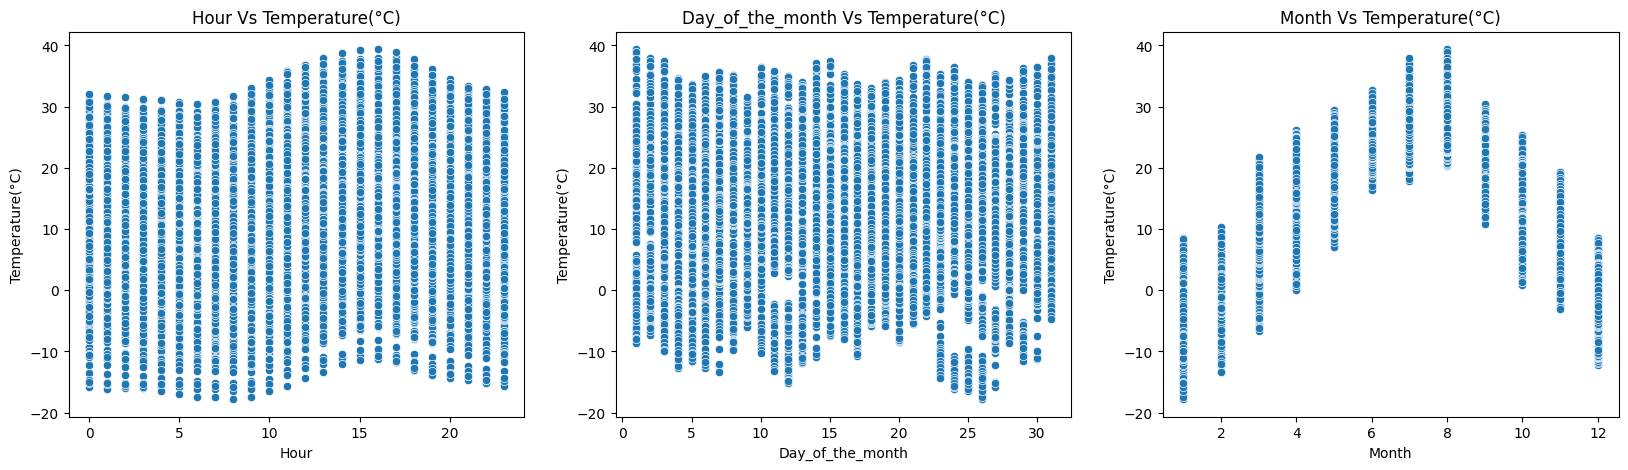

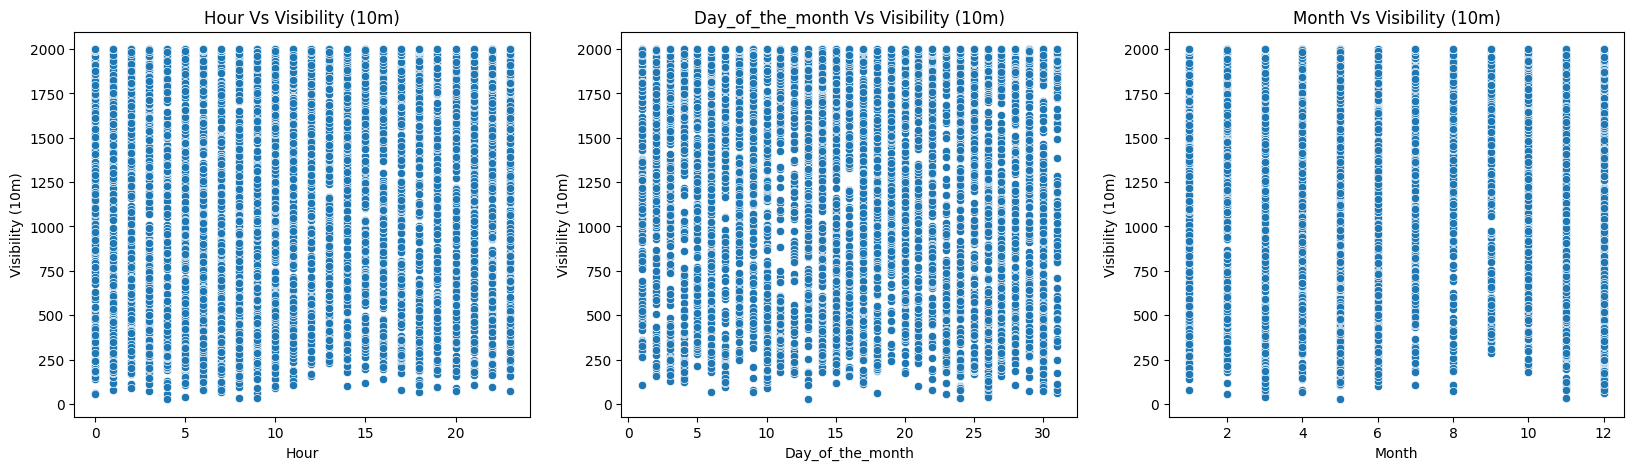

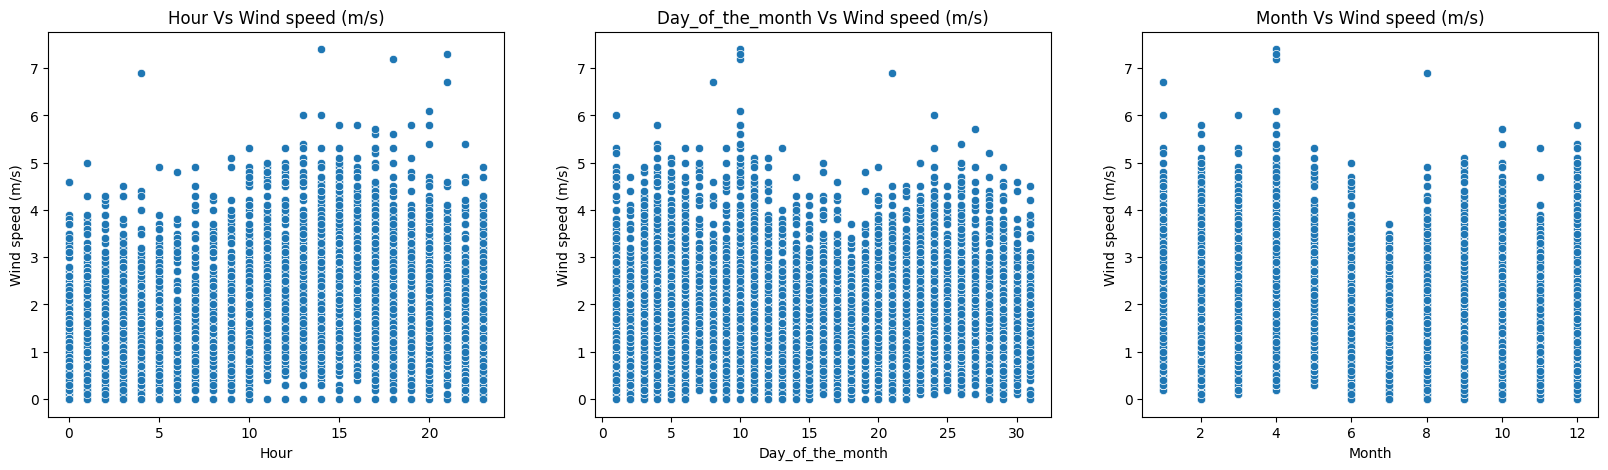

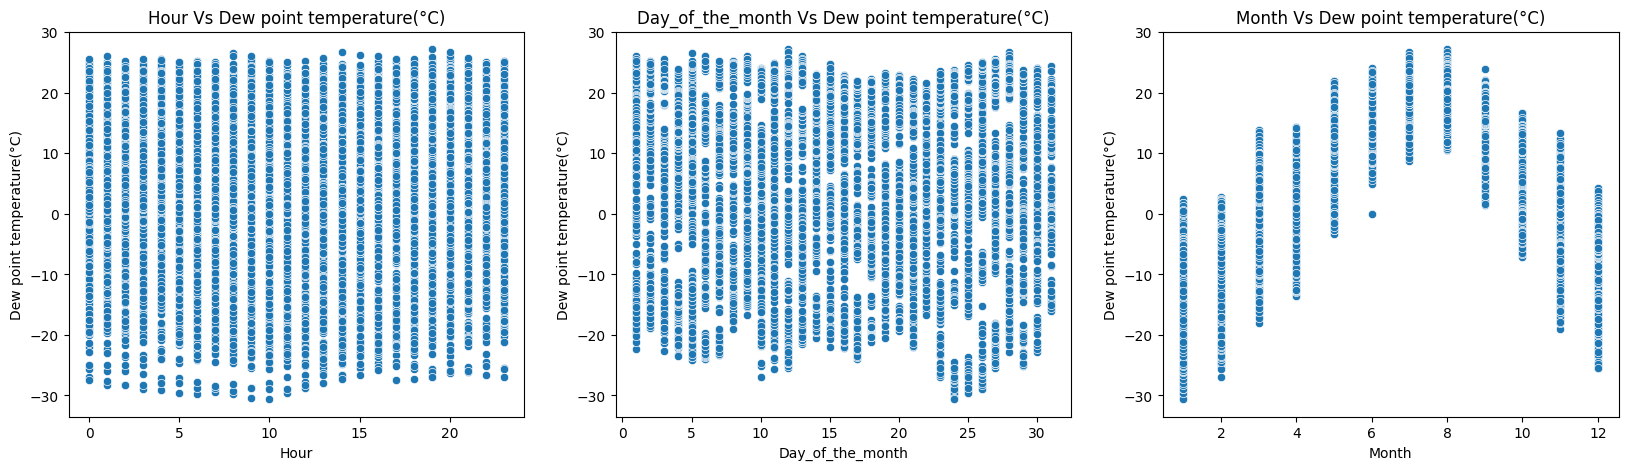

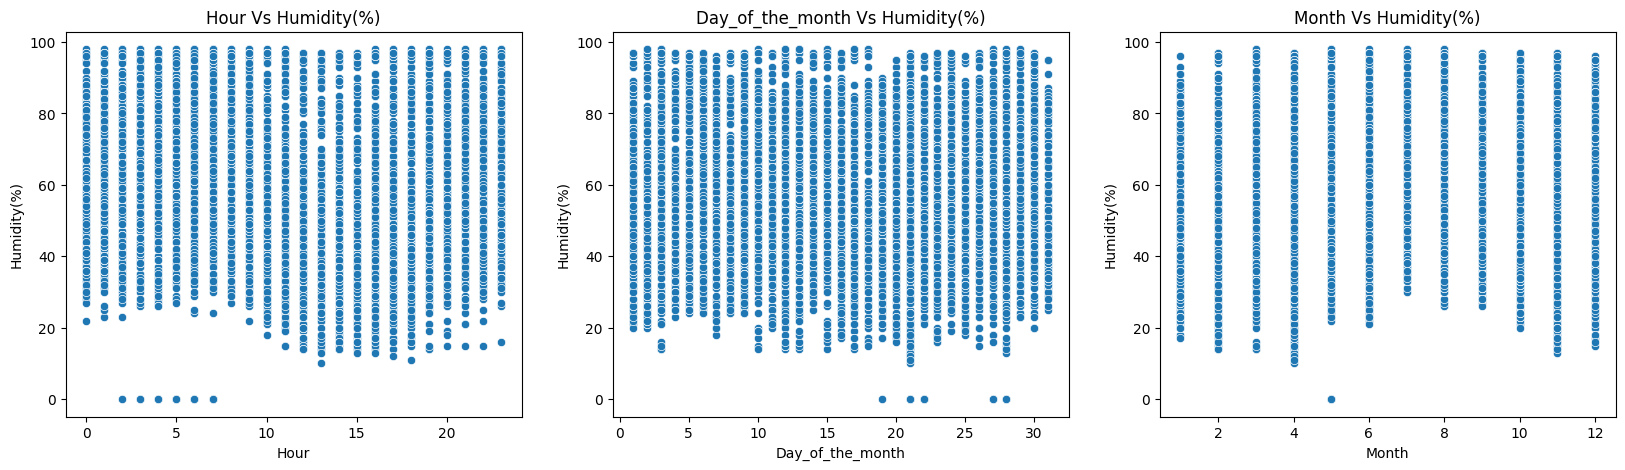

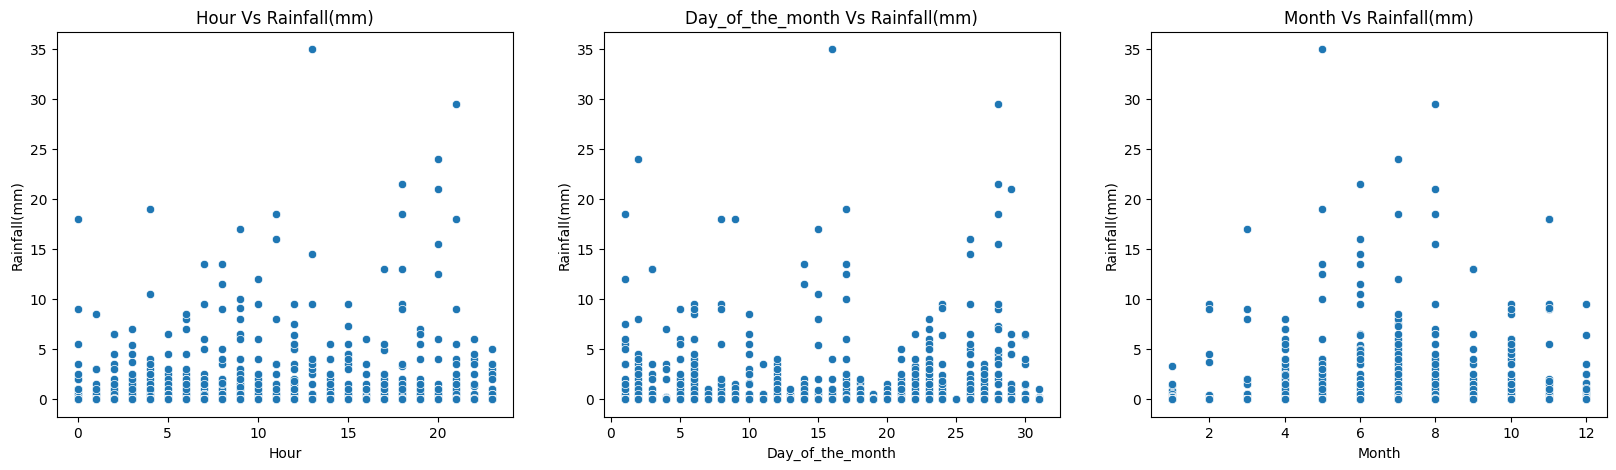

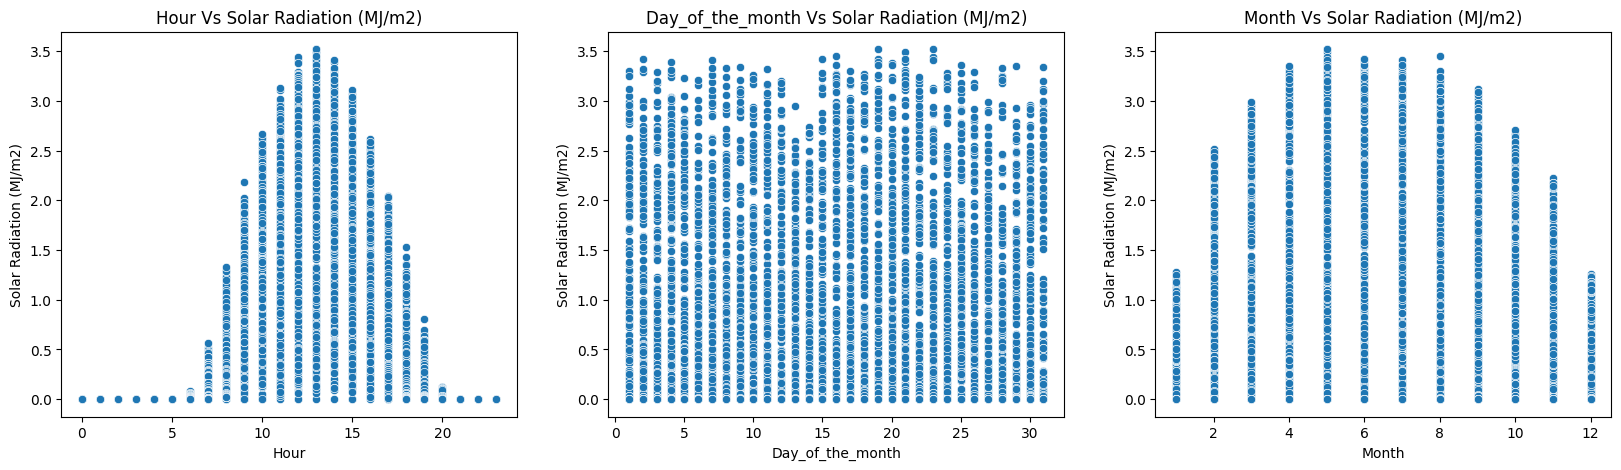

In [ ]:
# Plotting a scatter plot of all the numerical independent variables with respect to the hour,month and daily basis.

for col in ['Snowfall (cm)','Temperature(°C)','Visibility (10m)','Wind speed (m/s)','Dew point temperature(°C)','Humidity(%)','Rainfall(mm)','Solar Radiation (MJ/m2)']:
  fig, ax = plt.subplots(1,3, figsize = (20,5))
  for index,col1 in enumerate(['Hour','Day_of_the_month','Month']):
    sns.scatterplot(x = df[col1], y = df[col], ax = ax[index])
    ax[index].set_title(f'{col1} Vs {col}')
  plt.show()
  print('\n\n\n')


##### 1. Why did you pick the specific chart?

Scatterplots are a type of data visualization used to represent the relationship between two continuous variables. They display individual data points as points on a Cartesian plane, with one variable represented on the x-axis and the other variable on the y-axis.Here we used on all numerical independent variables.

##### 2. What is/are the insight(s) found from the chart?

The insights obtained from the analysis are:

- Snowfall is higher during the months from 11 to 2 (November to February).

- Rainfall is higher during the months from 4 to 10 (April to October).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Snowfall** : Knowing that snowfall is higher during the months from November to February allows businesses to plan their operations accordingly.

**Rainfall** : Understanding that rainfall is higher during the months from April to October allows businesses to prepare for increased bike demand during the dry periods. During rainy months, businesses can focus on maintenance and promotion of other services. Additionally, they can implement rainproof solutions or offer discounts on rainy days to encourage bike usage even during light showers.

#### Chart - 7 Visualization of avg bike count with respective to date

Text(0.5, 1.0, 'Average bike count vs Date')

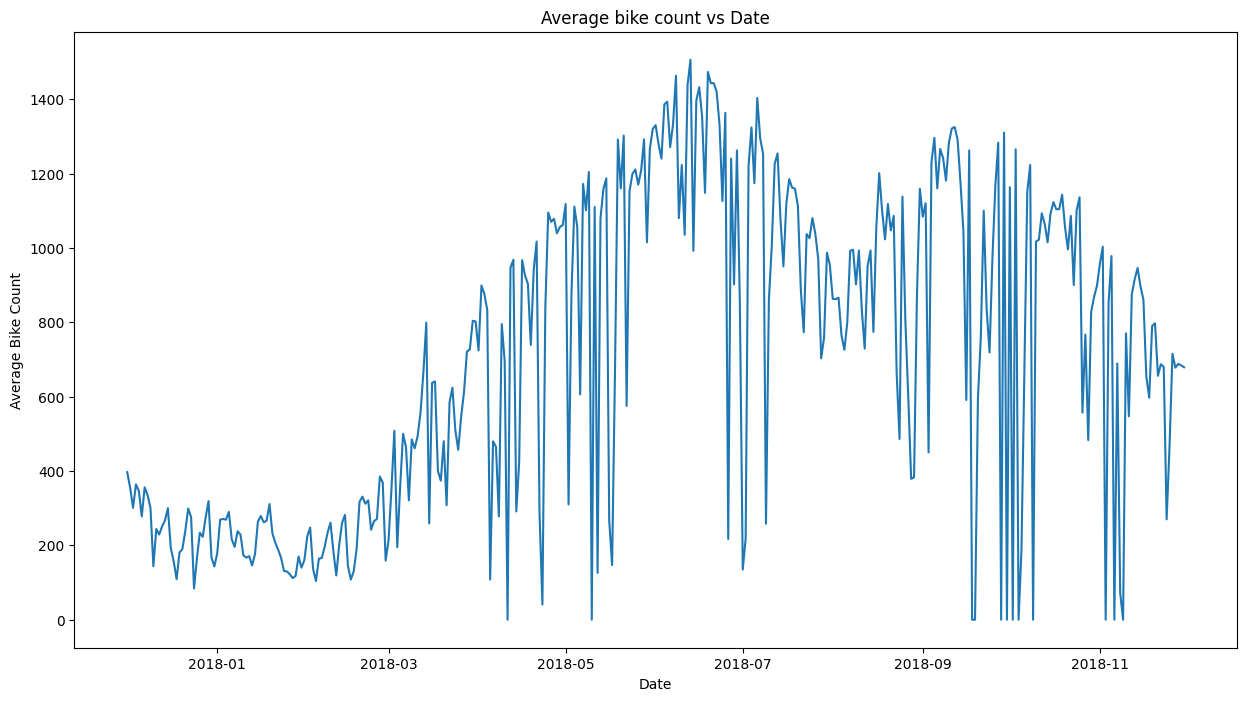

In [ ]:
# Chart - 7 plotting line chart on avg bike count and date
plt.figure(figsize = ( 15,8))
temp_df = pd.DataFrame(round(df.groupby('Date')['Rented Bike Count'].mean())).rename(columns = {'Rented Bike Count':'Average Bike Count'})
sns.lineplot(x = temp_df.index, y = temp_df['Average Bike Count'])
plt.title('Average bike count vs Date')

##### 1. Why did you pick the specific chart?

Line plots are a type of data visualization used to display the trend or pattern of a continuous variable over time or across ordered categories. They consist of data points connected by straight lines, creating a continuous line that represents the relationship between the variables.Here we used on average bike count with respective to the date.

##### 2. What is/are the insight(s) found from the chart?

The insights obtained are as follows:

- The trend of the average bike count is higher from April to November, indicating increased bike usage during these months.
- The bike count shows a slight decrease from January to March, suggesting relatively lower bike usage during this period.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Peak season: During these peak months, businesses can focus on increasing bike availability, expanding marketing efforts, and offering seasonal promotions or packages. This strategic approach can lead to higher revenue and customer satisfaction.

Seasonal Offers: Introduce attractive winter-specific offers, such as discounts for off-peak hours or longer rental periods. These incentives can encourage customers to use bikes even during colder months from january to march.

#### Chart - 8 Visualization of categorical variable with repsective to Hour, day, monthly basis

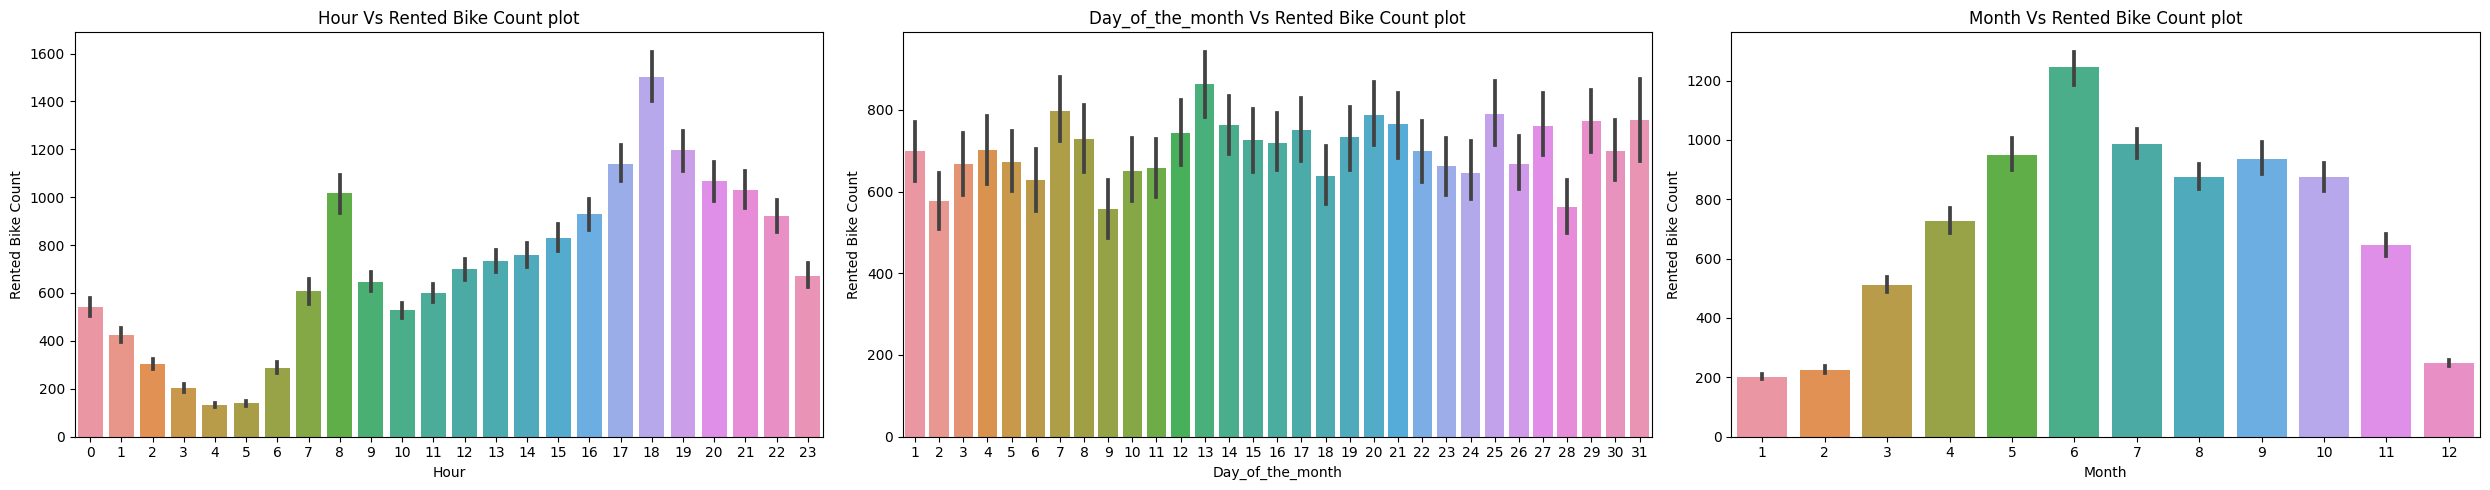

In [ ]:
# Visualization of categorical variables on timely baisis
fig, ax = plt.subplots(1,3, figsize = (25,5))
for index, col1 in enumerate(['Hour','Day_of_the_month','Month']):
  sns.barplot(x = df[col1], y = df['Rented Bike Count'], ax = ax[index])
  ax[index].set_title(f'{col1} Vs {dep_var} plot')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Bar plots, also known as bar charts, are a popular type of data visualization used to display the distribution of categorical data or compare different categories or groups. They consist of rectangular bars of varying lengths, where the height of each bar represents the frequency, count, or value of the corresponding category.We used to know the count with respective to the hour,day,and monthly basis.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***